# **Install required libraries**

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk xgboost wordcloud

In [ ]:


import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
import warnings


# **Downloading NLTK Resources**

In [ ]:
warnings.filterwarnings("ignore")

# NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Importing and loading data**

In [ ]:
data = pd.read_csv('training_data.csv')
data

,company_name,job_description,position_title,description_length,model_response
0,Google,minimum qualifications\nbachelors degree or eq...,Sales Specialist,2727,"{\n ""Core Responsibilities"": ""Responsible fo..."
1,Apple,description\nas an asc you will be highly infl...,Apple Solutions Consultant,828,"{\n ""Core Responsibilities"": ""as an asc you ..."
2,Netflix,its an amazing time to be joining netflix as w...,Licensing Coordinator - Consumer Products,3205,"{\n ""Core Responsibilities"": ""Help drive bus..."
3,Robert Half,description\n\nweb designers looking to expand...,Web Designer,2489,"{\n ""Core Responsibilities"": ""Designing webs..."
4,TrackFive,at trackfive weve got big goals were on a miss...,Web Developer,3167,"{\n ""Core Responsibilities"": ""Build and layo..."
...,...,...,...,...,...
848,Menards,job description\n\nparttime\n\nmake big money ...,Management Internship,1122,"{\n ""Core Responsibilities"": ""Responsibiliti..."
849,Parker,responsibilities\nparkers internship program w...,Human Resources Internship - Corporate (Year-...,3840,"{\n ""Core Responsibilities"": ""Assist in gene..."
850,Borgen Project,the borgen project is an innovative national ...,Writer / Journalist Internship,897,"{\n ""Core Responsibilities"": ""Write one arti..."
851,Wyndham Destinations,put the world on vacation\n\nat wyndham destin...,Inbound Customer Service / Sales (Remote),4604,"{\n ""Core Responsibilities"": ""Answer inbound..."


# **Analyzing Data and Cleaning Data**

In [ ]:
# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())
def clean_text(text):
    """
    Function to clean the job description text by:
    - Converting text to lowercase
    - Removing digits
    - Removing extra whitespace
    - Removing special characters and punctuation
    - Stripping leading and trailing whitespace
    """
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.strip()

# cleaning function to job descriptions
print("Cleaning job descriptions...")
data['cleaned_job_description'] = data['job_description'].apply(clean_text)
print("Job descriptions cleaned.")

# Removing duplicates and missing values
print("Checking for duplicates and missing values...")
num_duplicates = data.duplicated(subset='job_description').sum()
data.drop_duplicates(subset='job_description', inplace=True)
print(f"Removed {num_duplicates} duplicate entries.")

# Removing rows with missing job descriptions
num_missing = data['job_description'].isnull().sum()
data.dropna(subset=['job_description'], inplace=True)
print(f"Removed {num_missing} rows with missing job descriptions.")

# Summary
print(f"Data shape after cleaning: {data.shape}")
print("First few rows after cleaning:")
print(data.head())



First few rows of the dataset:
  company_name                                    job_description  \
0       Google  minimum qualifications\nbachelors degree or eq...   
1        Apple  description\nas an asc you will be highly infl...   
2      Netflix  its an amazing time to be joining netflix as w...   
3  Robert Half  description\n\nweb designers looking to expand...   
4    TrackFive  at trackfive weve got big goals were on a miss...   

                              position_title  description_length  \
0                           Sales Specialist                2727   
1                 Apple Solutions Consultant                 828   
2  Licensing Coordinator - Consumer Products                3205   
3                               Web Designer                2489   
4                              Web Developer                3167   

                                      model_response  
0   {\n  "Core Responsibilities": "Responsible fo...  
1   {\n  "Core Responsibilities": "

Average job description length (words): 481.63


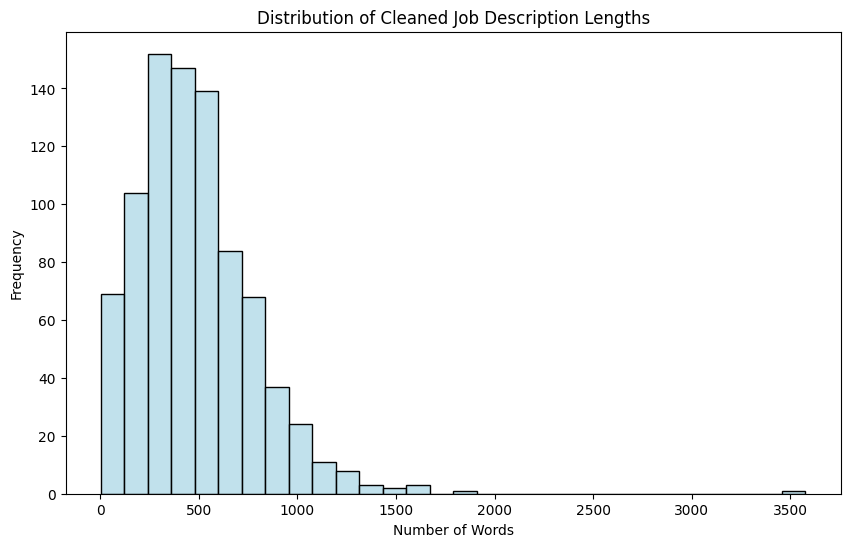

In [ ]:
def analyze_job_description_length(data):
    """
    Function to analyze the length of cleaned job descriptions.
    This helps understand the distribution of job description lengths.
    """
    data['job_desc_length'] = data['cleaned_job_description'].apply(lambda x: len(x.split()))
    print(f"Average job description length (words): {data['job_desc_length'].mean():.2f}")

    # Visualizing
    plt.figure(figsize=(10, 6))
    sns.histplot(data['job_desc_length'], bins=30, color='lightblue')
    plt.title('Distribution of Cleaned Job Description Lengths')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.show()

analyze_job_description_length(data)

# **Word Cloud**

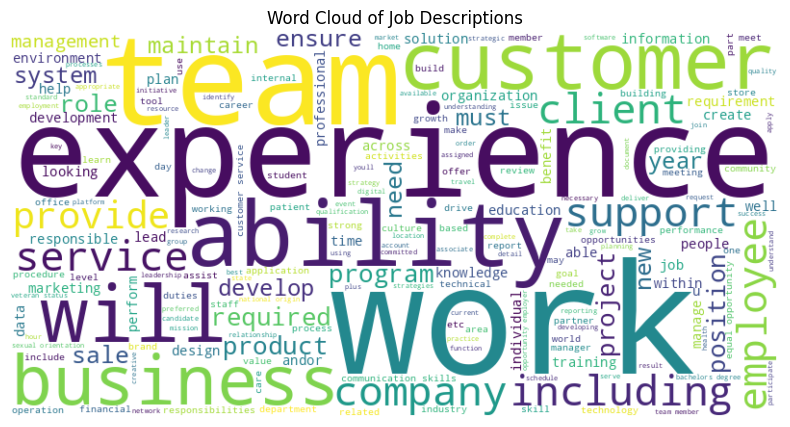

,company_name,job_description,position_title,description_length,model_response,cleaned_job_description,job_desc_length
0,Google,minimum qualifications\nbachelors degree or eq...,Sales Specialist,2727,"{\n ""Core Responsibilities"": ""Responsible fo...",minimum qualifications bachelors degree or equ...,384
1,Apple,description\nas an asc you will be highly infl...,Apple Solutions Consultant,828,"{\n ""Core Responsibilities"": ""as an asc you ...",description as an asc you will be highly influ...,126
2,Netflix,its an amazing time to be joining netflix as w...,Licensing Coordinator - Consumer Products,3205,"{\n ""Core Responsibilities"": ""Help drive bus...",its an amazing time to be joining netflix as w...,455
3,Robert Half,description\n\nweb designers looking to expand...,Web Designer,2489,"{\n ""Core Responsibilities"": ""Designing webs...",description web designers looking to expand yo...,372
4,TrackFive,at trackfive weve got big goals were on a miss...,Web Developer,3167,"{\n ""Core Responsibilities"": ""Build and layo...",at trackfive weve got big goals were on a miss...,485
...,...,...,...,...,...,...,...
848,Menards,job description\n\nparttime\n\nmake big money ...,Management Internship,1122,"{\n ""Core Responsibilities"": ""Responsibiliti...",job description parttime make big money at men...,171
849,Parker,responsibilities\nparkers internship program w...,Human Resources Internship - Corporate (Year-...,3840,"{\n ""Core Responsibilities"": ""Assist in gene...",responsibilities parkers internship program wa...,530
850,Borgen Project,the borgen project is an innovative national ...,Writer / Journalist Internship,897,"{\n ""Core Responsibilities"": ""Write one arti...",the borgen project is an innovative national c...,142
851,Wyndham Destinations,put the world on vacation\n\nat wyndham destin...,Inbound Customer Service / Sales (Remote),4604,"{\n ""Core Responsibilities"": ""Answer inbound...",put the world on vacation at wyndham destinati...,757


In [ ]:
def plot_word_cloud(data):
    """
    Function to create a word cloud from job descriptions.
    """
    all_words = ' '.join(data['cleaned_job_description'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Job Descriptions')
    plt.show()

# Plot
plot_word_cloud(data)
data

# **Exploratory Data Analysis (EDA)**

Summary Statistics for Job Description Lengths:
count     853.000000
mean      481.628370
std       304.240568
min         3.000000
25%       281.000000
50%       439.000000
75%       629.000000
max      3576.000000
Name: job_length, dtype: float64


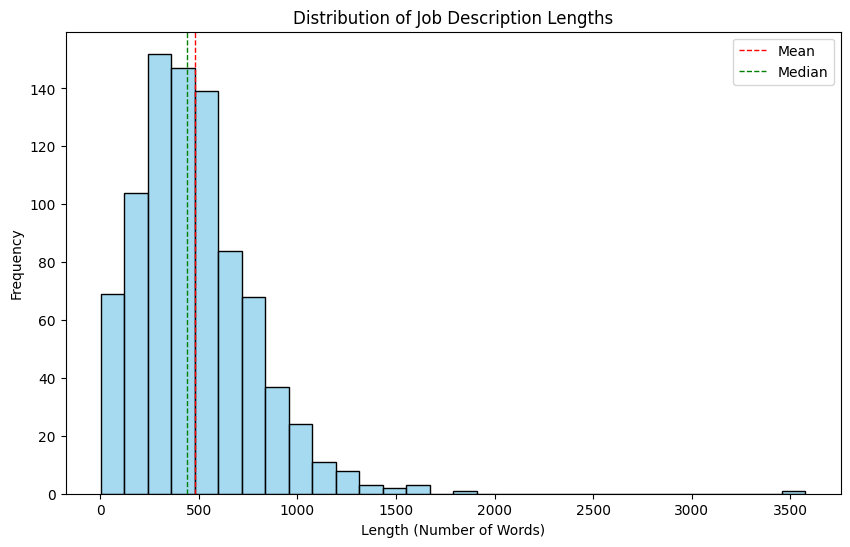

In [ ]:
def plot_job_length_distribution(data):
    """
    Function to visualize the distribution of job description lengths and provide summary statistics.
    """
    data['job_length'] = data['cleaned_job_description'].apply(lambda x: len(x.split()))

    # Summary statistics
    print("Summary Statistics for Job Description Lengths:")
    print(data['job_length'].describe())

    # Plot
    plt.figure(figsize=(10, 6))
    sns.histplot(data['job_length'], bins=30, color='skyblue')
    plt.title('Distribution of Job Description Lengths')
    plt.xlabel('Length (Number of Words)')
    plt.ylabel('Frequency')
    plt.axvline(data['job_length'].mean(), color='red', linestyle='dashed', linewidth=1)
    plt.axvline(data['job_length'].median(), color='green', linestyle='dashed', linewidth=1)
    plt.legend({'Mean': data['job_length'].mean(), 'Median': data['job_length'].median()})
    plt.show()

plot_job_length_distribution(data)


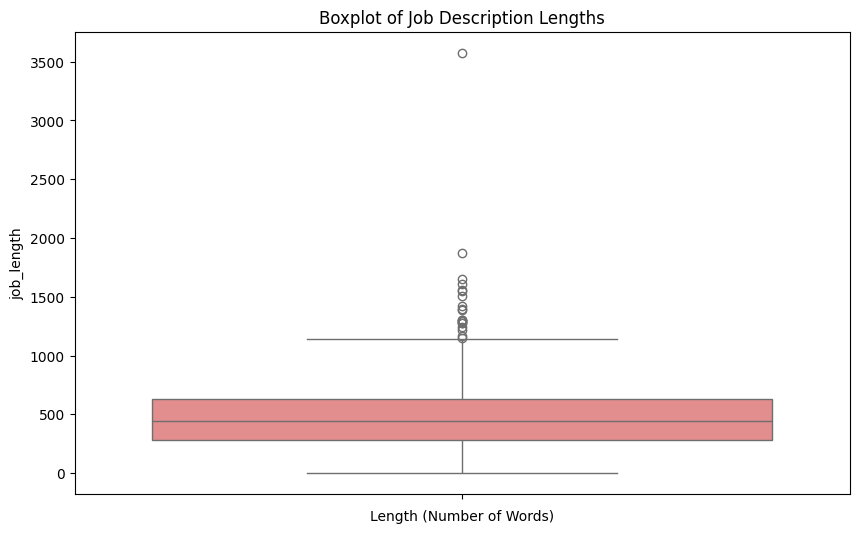

In [ ]:

    # Box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data['job_length'], color='lightcoral')
    plt.title('Boxplot of Job Description Lengths')
    plt.xlabel('Length (Number of Words)')
    plt.show()


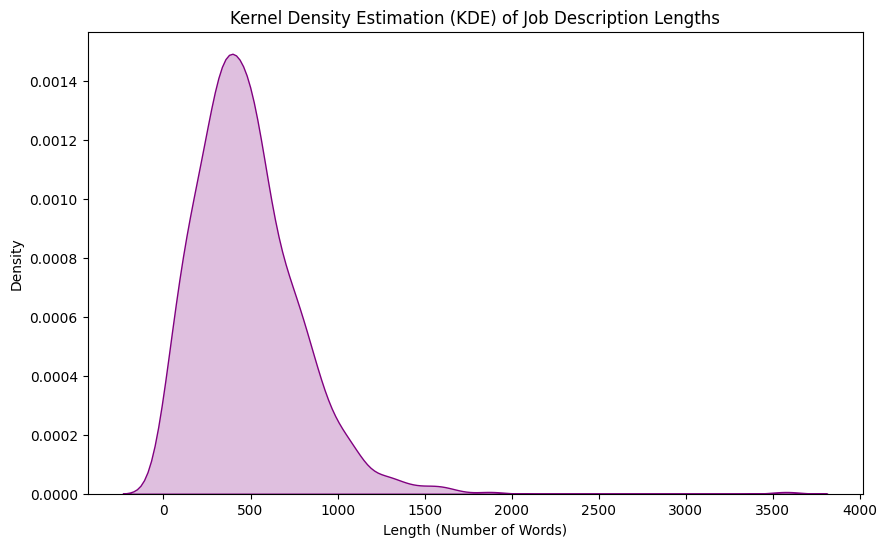

In [ ]:

    # KDE plot
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data['job_length'], shade=True, color='purple')
    plt.title('Kernel Density Estimation (KDE) of Job Description Lengths')
    plt.xlabel('Length (Number of Words)')
    plt.ylabel('Density')
    plt.show()

# **Extracting Skills**

Data with extracted skills:
                                     job_description  \
0  minimum qualifications\nbachelors degree or eq...   
1  description\nas an asc you will be highly infl...   
2  its an amazing time to be joining netflix as w...   
3  description\n\nweb designers looking to expand...   
4  at trackfive weve got big goals were on a miss...   

                                    extracted_skills  
0                      [communication, sales, cloud]  
1                             [communication, sales]  
2                  [communication, sales, marketing]  
3  [html, cloud, javascript, css, finance, market...  
4                  [communication, javascript, html]  


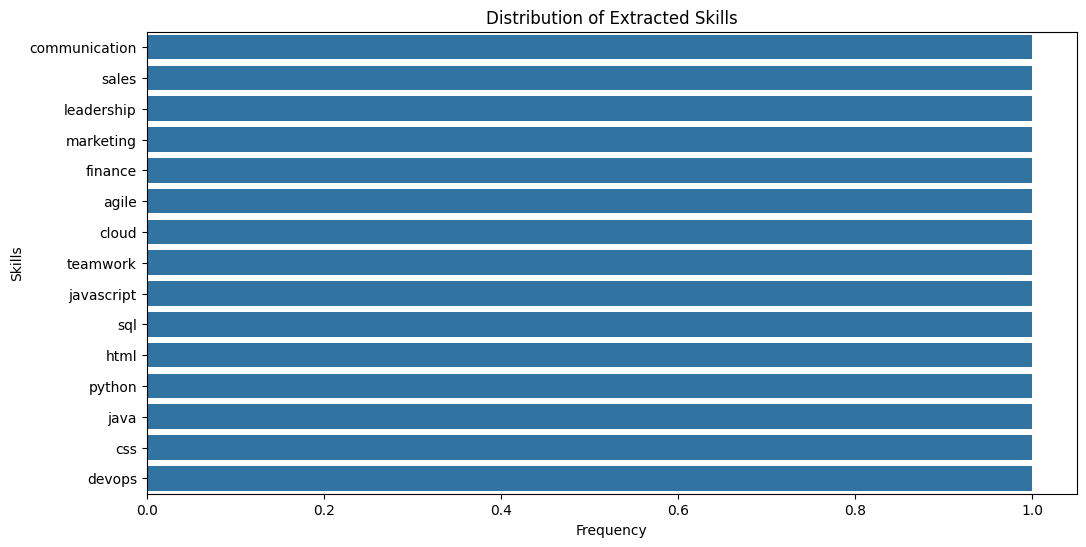

,company_name,job_description,position_title,description_length,model_response,cleaned_job_description,job_desc_length,job_length,extracted_skills
0,Google,minimum qualifications\nbachelors degree or eq...,Sales Specialist,2727,"{\n ""Core Responsibilities"": ""Responsible fo...",minimum qualifications bachelors degree or equ...,384,384,"[communication, sales, cloud]"
1,Apple,description\nas an asc you will be highly infl...,Apple Solutions Consultant,828,"{\n ""Core Responsibilities"": ""as an asc you ...",description as an asc you will be highly influ...,126,126,"[communication, sales]"
2,Netflix,its an amazing time to be joining netflix as w...,Licensing Coordinator - Consumer Products,3205,"{\n ""Core Responsibilities"": ""Help drive bus...",its an amazing time to be joining netflix as w...,455,455,"[communication, sales, marketing]"
3,Robert Half,description\n\nweb designers looking to expand...,Web Designer,2489,"{\n ""Core Responsibilities"": ""Designing webs...",description web designers looking to expand yo...,372,372,"[html, cloud, javascript, css, finance, market..."
4,TrackFive,at trackfive weve got big goals were on a miss...,Web Developer,3167,"{\n ""Core Responsibilities"": ""Build and layo...",at trackfive weve got big goals were on a miss...,485,485,"[communication, javascript, html]"


In [ ]:
# Known skills
known_skills = [
    'python', 'java', 'c++', 'javascript', 'sql', 'html', 'css',
    'project management', 'communication', 'teamwork', 'leadership',
    'agile', 'devops', 'data analysis', 'machine learning', 'cloud',
    'marketing', 'finance', 'sales', 'ui/ux', 'customer service',
]

def extract_skills(text):
    """
    Function to extract skills from job descriptions.
    """
    words = word_tokenize(text)
    skills = list(set(word for word in words if word in known_skills))
    return skills

data['extracted_skills'] = data['cleaned_job_description'].apply(extract_skills)

# Updated dataframe with extracted skills
print("Data with extracted skills:")
print(data[['job_description', 'extracted_skills']].head())

# Skills Analysis
def plot_skills_distribution(data):
    """
    Function to visualize the distribution of extracted skills.
    """
    skills_list = [skill for sublist in data['extracted_skills'] for skill in sublist]
    skills_series = pd.Series(skills_list)

    plt.figure(figsize=(12, 6))
    sns.countplot(y=skills_series.value_counts().index, order=skills_series.value_counts().index)
    plt.title('Distribution of Extracted Skills')
    plt.xlabel('Frequency')
    plt.ylabel('Skills')
    plt.show()

# Plot skills distribution after skills extraction is done
plot_skills_distribution(data)
data
data.head(5)

# **Models**

# **Traditional NLP Model (TF-IDF)**

In [ ]:
def prepare_skills_for_tfidf(data):
    """
    Function to preprocess extracted skills and perform TF-IDF vectorization.
    """
    data['skills_joined'] = data['extracted_skills'].apply(lambda x: ' '.join(x))

    # Initializing TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(tokenizer=word_tokenize, stop_words='english', ngram_range=(1, 2))

    # Performing TF-IDF vectorization
    tfidf_matrix = vectorizer.fit_transform(data['skills_joined'])
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    # Checking for missing values
    if tfidf_df.isnull().sum().sum() == 0:
        print("No missing values found in the TF-IDF matrix.")
    else:
        print("Warning: Missing values found in the TF-IDF matrix.")

    output = pd.concat([data[['job_description', 'skills_joined']], tfidf_df], axis=1)

    output.to_csv('skills_output.csv', index=False)
    print("Output saved to 'skills_output.csv'.")

    return tfidf_df

tfidf_df = prepare_skills_for_tfidf(data)

No missing values found in the TF-IDF matrix.
Output saved to 'skills_output.csv'.


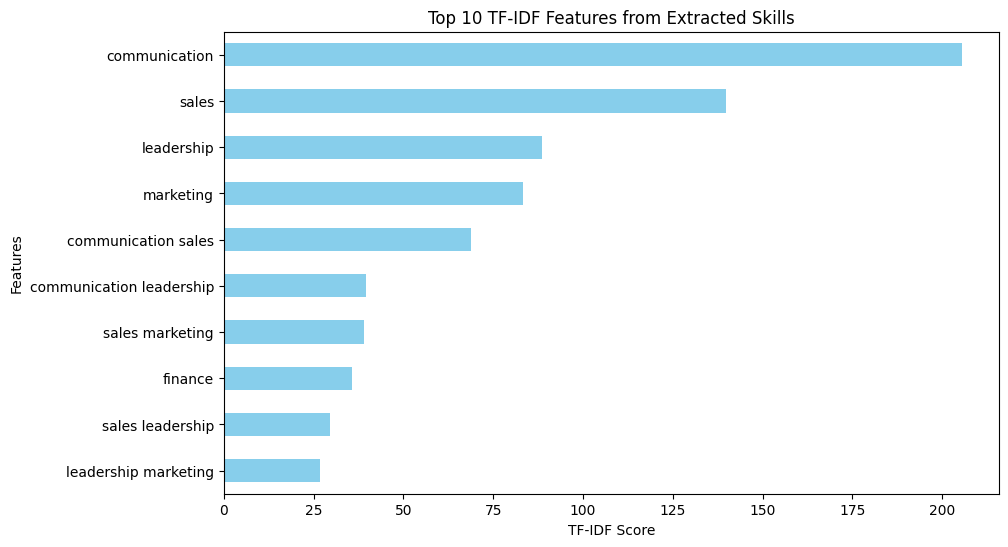

Top 10 TF-IDF Features:
communication               205.484559
sales                       139.774115
leadership                   88.727731
marketing                    83.364504
communication sales          68.698841
communication leadership     39.462891
sales marketing              38.922198
finance                      35.740035
sales leadership             29.545715
leadership marketing         26.749884
dtype: float64


In [ ]:
def plot_top_n_tfidf(tfidf_df, n=10):
    """
    Function to plot the top n TF-IDF features.
    """
    # Sum the values
    feature_sums = tfidf_df.sum(axis=0)

    # Identifying the top n features
    top_features = feature_sums.nlargest(n)

    # Ploting top TF-IDF features
    plt.figure(figsize=(10, 6))
    top_features.plot(kind='barh', color='skyblue')
    plt.title(f'Top {n} TF-IDF Features from Extracted Skills')
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Features')
    plt.gca().invert_yaxis()
    plt.show()
    print(f"Top {n} TF-IDF Features:")
    print(top_features)

plot_top_n_tfidf(tfidf_df, n=10)

# **Maching Learning Model (XGBoost Classification)**

Training samples: 682, Testing samples: 171
Training the XGBoost model...
Training complete.
Making predictions on the test set...

XGBoost Classification Report:
               precision    recall  f1-score   support

        agile       1.00      1.00      1.00        12
        cloud       1.00      1.00      1.00         6
communication       1.00      1.00      1.00        77
          css       1.00      0.40      0.57         5
       devops       0.00      0.00      0.00         7
      finance       1.00      1.00      1.00        15
         html       1.00      0.83      0.91         6
         java       1.00      1.00      1.00         4
   javascript       1.00      1.00      1.00         6
   leadership       1.00      1.00      1.00        35
    marketing       1.00      1.00      1.00        34
       python       1.00      1.00      1.00         2
        sales       1.00      1.00      1.00        49
          sql       1.00      1.00      1.00         5
     teamwo

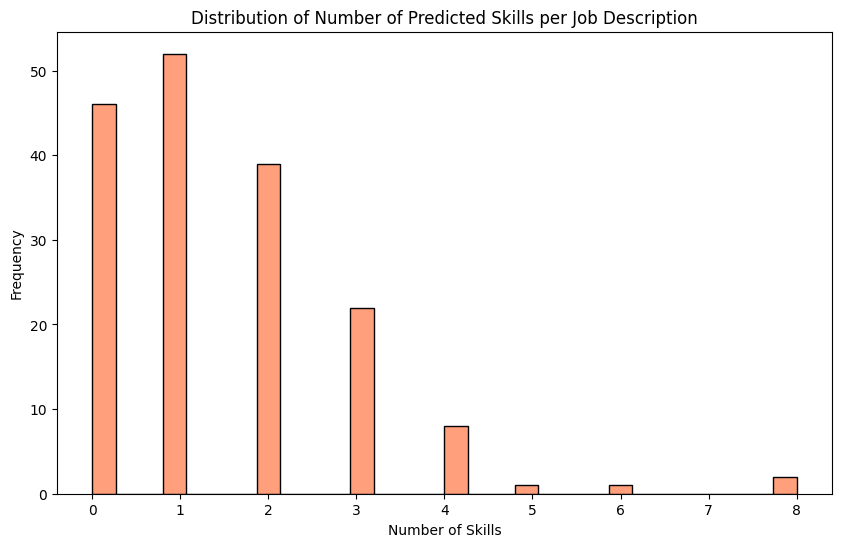

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, hamming_loss

def train_skill_prediction_model(data):
    """
    Function to train an XGBoost skill prediction model and evaluate its performance.
    """

    # Data Preprocessing
    # Checking the missing values
    if data['cleaned_job_description'].isnull().sum() > 0:
        raise ValueError("Missing values detected in 'cleaned_job_description'")
    if data['extracted_skills'].isnull().sum() > 0:
        raise ValueError("Missing values detected in 'extracted_skills'.")

    # Multi-label binarization
    mlb = MultiLabelBinarizer()
    y = mlb.fit_transform(data['extracted_skills'])
    X = data['cleaned_job_description']

    # Spliting the Data for Training and Testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

    # Building XGBoost Pipeline
    xgb_model = make_pipeline(
        TfidfVectorizer(tokenizer=word_tokenize, stop_words='english', ngram_range=(1, 2)),
        MultiOutputClassifier(XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42))
    )

    # Training XGBoost Model
    print("Training the XGBoost model...")
    xgb_model.fit(X_train, y_train)
    print("Training complete.")

    # Making Predictions
    print("Making predictions on the test set...")
    y_pred_xgb = xgb_model.predict(X_test)

    # Classification Report
    print("\nXGBoost Classification Report:")
    print(classification_report(y_test, y_pred_xgb, target_names=mlb.classes_))

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred_xgb)
    print(f"XGBoost Accuracy: {accuracy:.4f}")

    # Hamming Loss
    hamming = hamming_loss(y_test, y_pred_xgb)
    print(f"Hamming Loss: {hamming:.4f}")

    # Misclassification Rate
    misclassification_rate = 1 - accuracy
    print(f"Misclassification Rate: {misclassification_rate:.4f}")

    # Visualizing model performance
    plt.figure(figsize=(10, 6))
    sns.histplot([len(skills) for skills in mlb.inverse_transform(y_pred_xgb)], bins=30, color='coral')
    plt.title('Distribution of Number of Predicted Skills per Job Description')
    plt.xlabel('Number of Skills')
    plt.ylabel('Frequency')
    plt.show()

train_skill_prediction_model(data)


# **Saving Result**

In [ ]:
# Saving output to CSV
output = pd.DataFrame({
    'job_description': data['job_description'],
    'extracted_skills': data['extracted_skills']
})

output.to_csv('skills_output.csv', index=False)
print("Output saved to 'skills_output.csv'.")

Output saved to 'skills_output.csv'.
